<h1>1. Wprowadzenie</h1>
<br/>
<p>Celem ćwiczenia jest analiza danych pacjentów pobranych podczas badań w celu predykcji, czy dany użytkownik posiada chorobę sercowo-naczyniową. </p>
<p>W tym celu użyta zostanie uczenie maszynowe z nadzorem. Dane podzielone zostaną na dane treningowe oraz testowe w proporcjach kolejno 70% i 30%. </p>
<p>Przebadane zostaną różne algorytmy i modele klasyfikacji. Spodziewanym wynikiem badań będzie określenie, który z modeli klasyfikacji będzie najlepiej dawał sobie radę z klasyfikacją chorób serca oraz czy taki klasyfikator będzie mógł zostać użyty w celu pomocy lekarzom do diagnozy takich chorób.</p>
Podczas wykonywania tego ćwiczenia autor ma nadzieję poszerzyć swoją wiedzę w zakresie eksploracji danych i uczenia maszynowego.
<p> Poniżej zawarto szczegółowe informacje o analizowanym zbiorze danych:</p>
<br/>
<div><b>Zbiór danych:</b> <a href="https://www.kaggle.com/sulianova/cardiovascular-disease-dataset">Cardiovascular Disease dataset</a></div>
<div><b>Pojemność zbioru:</b> 70 000 rekordów</div>
<div><b>Opis danych:</b> Dostępne są trzy typy danych:
    <ul>Obiektywne - rzeczowe dane</ul>
    <ul>Badanie - wyniki badania medycznego</ul>
    <ul>Subiektywne - dane podane przez pacjenta</ul>
</div> 
<div><b>Cechy danych: </b></div>
<table>
    <tr>
        <th>Id</th>
        <th>Nazwa</th>
        <th>Typ danych</th>
        <th>Nazwa kolumny</th>
        <th>Typ wartosci</th>
    </tr>
    <tr>
         <td>1</td>
         <td>Wiek</td>
         <td>Obiektywne </td>
         <td>age </td>
         <td>int(dni) </td>
    </tr>
    <tr>
         <td>2</td>
         <td>Wzrost</td>
         <td>Obiektywne </td>
         <td>height </td>
         <td>int(cm) </td>
    </tr>
    <tr>
         <td>3</td>
         <td>Waga</td>
         <td>Obiektywne </td>
         <td>weight </td>
         <td>float (kg) </td>
    </tr>
    <tr>
         <td>4</td>
         <td>Płeć</td>
         <td>Obiektywne </td>
         <td>gender </td>
         <td>kod, 1-kobieta, 2-mężczyzna</td>
    </tr>
    <tr>
         <td>5</td>
         <td>Ciśnienie skurczowe</td>
         <td>Badanie </td>
         <td>ap_hi </td>
         <td>int</td>
    </tr>
    <tr>
         <td>6</td>
         <td>Ciśnienie rozkurczowe</td>
         <td>Badanie </td>
         <td>ap_ho </td>
         <td>int</td>
    </tr>
    <tr>
         <td>7</td>
         <td>Cholesterol</td>
         <td>Badanie </td>
         <td>cholesterol</td>
         <td>1: normalny, 2: powyżej normalnego, 3: dużo powyżej normalnego </td>
    </tr>
    <tr>
         <td>8</td>
         <td>Glukoza</td>
         <td>Badanie </td>
         <td>gluc </td>
         <td>1: normalny, 2: powyżej normalnego, 3: dużo powyżej normalnego </td>
    </tr>
    <tr>
         <td>9</td>
         <td>Palacz</td>
         <td>Subiektywne </td>
         <td>smoke </td>
         <td>binary</td>
    </tr>
    <tr>
         <td>10</td>
         <td>Alkohol</td>
         <td>Subiektywne </td>
         <td>alco </td>
         <td>binary</td>
    </tr>
    <tr>
         <td>11</td>
         <td>Aktywność fizyczna</td>
         <td>Subiektywne </td>
         <td>active </td>
         <td>binary</td>
    </tr>
    <tr>
         <td>12</td>
         <td>Obecność chorób serca</td>
         <td>Badanie </td>
         <td>cardio </td>
         <td>binary</td>
    </tr>
    
    
</table>


<h1>2. Opis przeprowadzonych badań</h1>
<p>Do badań wykorzystano następujące narzędzia:</p>
<li>Język programowania Python</li>
<li>Notatnik Jupyter do prezentowania wyników badań w przystępnej formie</li>
<li>Biblioteki i pakiety pomagające w obróbce i analizowaniu danych: pandas, matplotlib, numpy, seaborn, sklearn</li>
<br/>
<p>Narzędzia te pozwoliły na realizację kolejnych etapów eksploracji wybranego zbioru danych:</p>
<ul>1. Wczytanie i przygotowanie danych do obróbki </ul>
<ul>2. Poznanie danych</ul>
<ul>3. Określenie wagi dostępnych cech dla skuteczności klasyfikatora</ul>
<ul>4. Wybór cech użytych dla klasyfikatora</ul>
<ul>5. Podział danych na zbiory treningowe i testowe</ul>
<ul>6. Przebadanie różnych klasyfikatorów</ul>
<ul>7. Regulacja parametrów najlepszych klasyfikatorów</ul>
<br/>
Poniżej zaprezentowano realizację badań wg ustalonego planu:


<h2> Wczytanie i przygotowanie danych do obróbki</h2>

In [2]:
import pandas as pd

col_names = ["id", "age", "gender","height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]

# load dataset
data = pd.read_csv("cardio_dataset.csv", header=None, names=col_names, delimiter=";")

# drop rows with missing values
data.dropna(inplace=True)

data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<h2>Poznanie danych </h2>

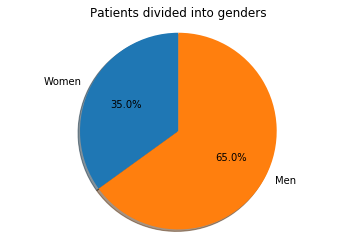

In [69]:
import matplotlib.pyplot as plt
import numpy as np

genders = pd.unique(data['gender'])

labels = ['Women', 'Men']

df = pd.DataFrame(data, columns=['gender', 'id', 'cardio']).groupby(by=['gender']).agg({'id':'count'}).reset_index()
df.rename(columns={'id': 'patientCount'}, inplace=True)


women_data  = df[df['gender'] == 1]['patientCount'].values[0]
men_data  = df[df['gender'] == 2]['patientCount'].values[0]

sizes = [men_data, women_data]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Patients divided into genders')
plt.show()

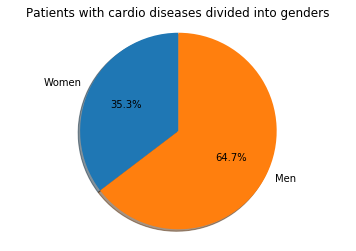

In [3]:
cardio_data = data[data['cardio'] == 1]
df = pd.DataFrame(cardio_data, columns=['gender', 'id']).groupby(by=['gender']).agg({'id':'count'}).reset_index()
df.rename(columns={'id': 'patientCount'}, inplace=True)


women_data  = df[df['gender'] == 1]['patientCount'].values[0]
men_data  = df[df['gender'] == 2]['patientCount'].values[0]

sizes = [men_data, women_data]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Patients with cardio diseases divided into genders')
plt.show()

In [4]:
print("Percent of people in the dataset with cardio disease: ", len(cardio_data)/len(data) * 100, "%")

Percent of people in the dataset with cardio disease:  49.97 %


<h2>Określenie wagi dostępnych cech dla skuteczności klasyfikatora oraz wybór cech</h2>

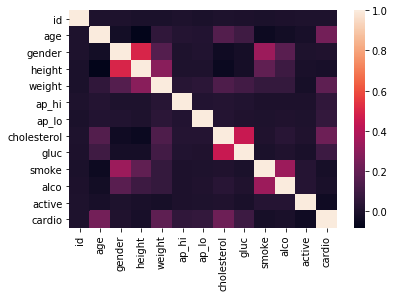

In [70]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

/home/magda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature age (0.290665)
2. feature ap_hi (0.183050)
3. feature weight (0.177082)
4. feature height (0.172577)
5. feature ap_lo (0.104774)
6. feature cholesterol (0.044789)
7. feature gluc (0.009969)
8. feature smoke (0.004708)
9. feature gender (0.004404)
10. feature active (0.004219)
11. feature alco (0.003762)


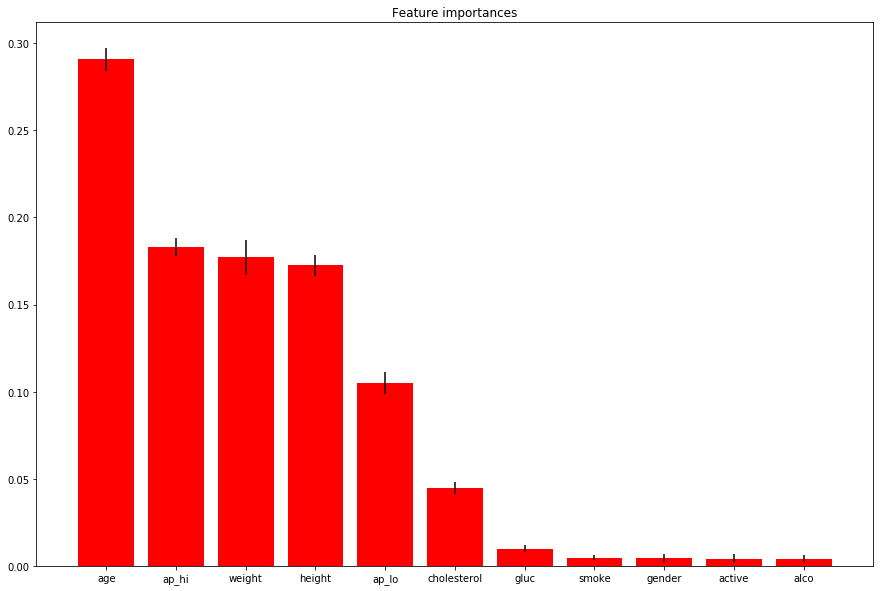

In [71]:

from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

feature_cols = ["age","gender","height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]
X = data[feature_cols] # Features
Y = data.cardio # Target variable

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, Y)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices_names =  list(map(lambda x: feature_cols[x], indices))

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, indices_names[f], importances[indices[f]]))

# Plot the feature importances of the model
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices_names)
plt.xlim([-1, X.shape[1]])
plt.show()


<h2> Podział danych na zbiory treningowe i testowe </h2>

In [63]:
from sklearn.model_selection import train_test_split # Import train_test_split function
chosen_features = ["age", "ap_hi", "weight", "height", "ap_lo", "cholesterol"]

X = data[chosen_features] # Chosen features
Y = data.cardio # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


<h1> Decision Tree Classifier </h1>

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Create simple Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


print("Decision Tree Classifier accuracy:",metrics.accuracy_score(y_test, y_pred))

# Check different model params
for i in range(1, 7):
    # Create Decision Tree classifer object with adhusted params
    clf = DecisionTreeClassifier(max_depth=i)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # Model Accuracy, how often is the classifier correct?
    print("Decision Tree Classifier accuracy with adjusted params [ depth:",i,"]: "  ,metrics.accuracy_score(y_test, y_pred))

Decision Tree Classifier accuracy: 0.6300714285714286
Decision Tree Classifier accuracy with adjusted params [ depth: 1 ]:  0.7145
Decision Tree Classifier accuracy with adjusted params [ depth: 2 ]:  0.7145
Decision Tree Classifier accuracy with adjusted params [ depth: 3 ]:  0.7268571428571429
Decision Tree Classifier accuracy with adjusted params [ depth: 4 ]:  0.7288928571428571
Decision Tree Classifier accuracy with adjusted params [ depth: 5 ]:  0.7272857142857143
Decision Tree Classifier accuracy with adjusted params [ depth: 6 ]:  0.7272857142857143


<h1>K Neighbors Classifier </h1>

In [61]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(5, 50, 2):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train,y_train)
    
    y_pred = neigh.predict(X_test)
    print("K Neighbors Classifier accuracy [ n: ",n, "]", metrics.accuracy_score(y_test, y_pred))

K Neighbors Classifier accuracy [ n:  5 ] 0.6785714285714286
K Neighbors Classifier accuracy [ n:  7 ] 0.6862857142857143
K Neighbors Classifier accuracy [ n:  9 ] 0.6929642857142857
K Neighbors Classifier accuracy [ n:  11 ] 0.6965
K Neighbors Classifier accuracy [ n:  13 ] 0.70175
K Neighbors Classifier accuracy [ n:  15 ] 0.7028214285714286
K Neighbors Classifier accuracy [ n:  17 ] 0.70475
K Neighbors Classifier accuracy [ n:  19 ] 0.7060714285714286
K Neighbors Classifier accuracy [ n:  21 ] 0.7062142857142857
K Neighbors Classifier accuracy [ n:  23 ] 0.7059285714285715
K Neighbors Classifier accuracy [ n:  25 ] 0.7066428571428571
K Neighbors Classifier accuracy [ n:  27 ] 0.7069285714285715
K Neighbors Classifier accuracy [ n:  29 ] 0.7058928571428571
K Neighbors Classifier accuracy [ n:  31 ] 0.7060357142857143
K Neighbors Classifier accuracy [ n:  33 ] 0.7068928571428571
K Neighbors Classifier accuracy [ n:  35 ] 0.7061785714285714
K Neighbors Classifier accuracy [ n:  37 ] 0.

<h1> Support Vector Classification </h1>

In [33]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Support Vector Classification accuracy", metrics.accuracy_score(y_test, y_pred))

Support Vector Classification accuracy 0.5657142857142857


In [35]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Support Vector Classification accuracy", metrics.accuracy_score(y_test, y_pred))

Support Vector Classification accuracy 0.5102380952380953


In [36]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Gaussian Naive Bayes accuracy", metrics.accuracy_score(y_test, y_pred))


Gaussian Naive Bayes accuracy 0.5796190476190476


In [41]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Gaussian Naive Bayes accuracy", metrics.accuracy_score(y_test, y_pred))

/home/magda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Gaussian Naive Bayes accuracy 0.7069047619047619


In [60]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=15, oob_score = True, n_jobs = -1, random_state =50,
                            max_features = "auto", min_samples_leaf = 50)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("___", metrics.accuracy_score(y_test, y_pred))

___ 0.7324642857142857


In [58]:
# TUNING PARAMS

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                 'n_estimators': [5, 10, 15, 20, 50, 100, 150, 200],
                 'max_depth': [2, 5, 7, 9, 10, 13, 15]
             }


grid_clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
grid_clf.fit(X_train, y_train)
log_reg = grid_clf.best_estimator_

y_pred = log_reg.predict(X_test)
print("____", metrics.accuracy_score(y_test, y_pred))

In [62]:

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

y_pred = log_reg.predict(X_test)
print("____", metrics.accuracy_score(y_test, y_pred))

/home/magda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/magda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/magda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/magda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/magda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: C

____ 0.7044761904761905


In [73]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

y_pred = tree_clf.predict(X_test)
print("____", metrics.accuracy_score(y_test, y_pred))

In [11]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(solver="eigen")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("____", metrics.accuracy_score(y_test, y_pred))

____ 0.6457619047619048
